ps 
Grey Blue format
blue are fields with ADM
grey are fields without ADM

size of dot shows 0-4 lesions per field

tiny  0 dot, 1-4 progressively  larger dots

add fillers for same number of samples in KC and KCG (Sarthak will delete fillers in prep of final figure)
add filler for left hand margin justification

In [28]:
# import necessary libraries and dependencies
import seaborn as sns
import pandas as pd
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read csv kcwt
total_path = Path('./P40-60-120_matplot.csv')

In [3]:
# Read into pd dataframe
total_df = pd.read_csv(total_path)
total_df.head()

,Field,P40_score,P40_pct_lesion,P40_adm,P40_score.1,P40_pct_lesion.1,P40_adm.1,P40_score.2,P40_pct_lesion.2,P40_adm.2,...,P60_adm,P60_score.1,P60_pct_lesion.1,P60_adm.1,P120_score,P120_pct_lesion,P120_adm,P120_score.1,P120_pct_lesion.1,P120_adm.1
0,1,0.0,NaN,NaN,0,NaN,NaN,0.0,NaN,NaN,...,NaN,1.0,NaN,A,4,NaN,NaN,4.0,25.0,NaN
1,2,0.0,NaN,NaN,0,NaN,NaN,0.0,NaN,NaN,...,NaN,2.0,NaN,NaN,4,25.0,A,2.0,NaN,NaN
2,3,0.0,NaN,NaN,0,NaN,NaN,0.0,NaN,NaN,...,NaN,1.0,NaN,A,6,25.0,A,1.0,25.0,NaN
3,4,0.0,NaN,NaN,0,NaN,NaN,0.0,NaN,NaN,...,NaN,1.0,NaN,A,1,NaN,NaN,1.0,NaN,NaN
4,5,1.0,NaN,NaN,0,NaN,NaN,0.0,NaN,NaN,...,A,2.0,NaN,A,2,NaN,A,2.0,NaN,A


In [4]:
# Replace all As with 1s and all NaN with 
total_df = total_df.replace('A', 1)

# Review dataframe
total_df.head()

,Field,P40_score,P40_pct_lesion,P40_adm,P40_score.1,P40_pct_lesion.1,P40_adm.1,P40_score.2,P40_pct_lesion.2,P40_adm.2,...,P60_adm,P60_score.1,P60_pct_lesion.1,P60_adm.1,P120_score,P120_pct_lesion,P120_adm,P120_score.1,P120_pct_lesion.1,P120_adm.1
0,1,0.0,NaN,NaN,0,NaN,NaN,0.0,NaN,NaN,...,NaN,1.0,NaN,1.0,4,NaN,NaN,4.0,25.0,NaN
1,2,0.0,NaN,NaN,0,NaN,NaN,0.0,NaN,NaN,...,NaN,2.0,NaN,NaN,4,25.0,1.0,2.0,NaN,NaN
2,3,0.0,NaN,NaN,0,NaN,NaN,0.0,NaN,NaN,...,NaN,1.0,NaN,1.0,6,25.0,1.0,1.0,25.0,NaN
3,4,0.0,NaN,NaN,0,NaN,NaN,0.0,NaN,NaN,...,NaN,1.0,NaN,1.0,1,NaN,NaN,1.0,NaN,NaN
4,5,1.0,NaN,NaN,0,NaN,NaN,0.0,NaN,NaN,...,1.0,2.0,NaN,1.0,2,NaN,1.0,2.0,NaN,1.0


In [5]:
# Slice P40 dataframe
p40_df = total_df.iloc[:, :10]
p40_df.head()

,Field,P40_score,P40_pct_lesion,P40_adm,P40_score.1,P40_pct_lesion.1,P40_adm.1,P40_score.2,P40_pct_lesion.2,P40_adm.2
0,1,0.0,NaN,NaN,0,NaN,NaN,0.0,NaN,NaN
1,2,0.0,NaN,NaN,0,NaN,NaN,0.0,NaN,NaN
2,3,0.0,NaN,NaN,0,NaN,NaN,0.0,NaN,NaN
3,4,0.0,NaN,NaN,0,NaN,NaN,0.0,NaN,NaN
4,5,1.0,NaN,NaN,0,NaN,NaN,0.0,NaN,NaN


In [6]:
# Slice P60 dataframe
p60_df = total_df.iloc[:, 10:16]

# Add the Field attribute
p60_df['Field'] = total_df['Field']

# Preview DataFrame
p60_df.head()

,P60_score,P60_pct_lesion,P60_adm,P60_score.1,P60_pct_lesion.1,P60_adm.1,Field
0,0.0,NaN,NaN,1.0,NaN,1.0,1
1,0.0,NaN,NaN,2.0,NaN,NaN,2
2,0.0,NaN,NaN,1.0,NaN,1.0,3
3,0.0,NaN,NaN,1.0,NaN,1.0,4
4,2.0,NaN,1.0,2.0,NaN,1.0,5


In [7]:
# Slice P120 dataframe
p120_df = total_df.iloc[:, 16:]

# add Field number
p120_df['Field'] = total_df['Field']

# Preview DataFrame
p120_df.head()


,P120_score,P120_pct_lesion,P120_adm,P120_score.1,P120_pct_lesion.1,P120_adm.1,Field
0,4,NaN,NaN,4.0,25.0,NaN,1
1,4,25.0,1.0,2.0,NaN,NaN,2
2,6,25.0,1.0,1.0,25.0,NaN,3
3,1,NaN,NaN,1.0,NaN,NaN,4
4,2,NaN,1.0,2.0,NaN,1.0,5


In [8]:
# Create the p40 individual dataframes
p40_1_df = (p40_df.loc[:, ['Field', 'P40_score', 'P40_pct_lesion', 'P40_adm']].assign(group = 1).set_axis(
    ['Field','P40_score', 'P40_pct_lesion', 'P40_adm', 'P40_mouse'], axis=1))
p40_2_df = (p40_df.loc[:, ['Field', 'P40_score.1', 'P40_pct_lesion.1', 'P40_adm.1']].assign(group = 2).set_axis(
    ['Field','P40_score', 'P40_pct_lesion', 'P40_adm', 'P40_mouse'], axis=1))
p40_3_df = (p40_df.loc[:, ['Field', 'P40_score.2', 'P40_pct_lesion.2', 'P40_adm.2']].assign(group = 3).set_axis(
    ['Field','P40_score', 'P40_pct_lesion', 'P40_adm', 'P40_mouse'], axis=1))
p40_1_df.head()

,Field,P40_score,P40_pct_lesion,P40_adm,P40_mouse
0,1,0.0,NaN,NaN,1
1,2,0.0,NaN,NaN,1
2,3,0.0,NaN,NaN,1
3,4,0.0,NaN,NaN,1
4,5,1.0,NaN,NaN,1


In [9]:
# # Add Mouse Column to p40s
# p40_1_df['P40_mouse'] = '1'
# p40_2_df['P40_mouse'] = '2'
# p40_3_df['P40_mouse'] = '3'
# p40_3_df.head()

In [10]:
# fill adm na with 0s
p40_1_df['P40_adm'] = p40_1_df['P40_adm'].fillna(0)
p40_2_df['P40_adm'] = p40_2_df['P40_adm'].fillna(0)
p40_3_df['P40_adm'] = p40_3_df['P40_adm'].fillna(0)
p40_3_df.head()

,Field,P40_score,P40_pct_lesion,P40_adm,P40_mouse
0,1,0.0,NaN,0.0,3
1,2,0.0,NaN,0.0,3
2,3,0.0,NaN,0.0,3
3,4,0.0,NaN,0.0,3
4,5,0.0,NaN,0.0,3


In [11]:
# change pct_lesion to 0
p40_1_df['P40_pct_lesion'] = p40_1_df['P40_pct_lesion'].fillna(1)
p40_2_df['P40_pct_lesion'] = p40_2_df['P40_pct_lesion'].fillna(1)
p40_3_df['P40_pct_lesion'] = p40_3_df['P40_pct_lesion'].fillna(1)

In [12]:
# drop na from score values 
p40_1_df = p40_1_df.dropna()
p40_2_df = p40_2_df.dropna()
p40_3_df = p40_3_df.dropna()


In [13]:
# Create merged p40 df
p40_merged = pd.concat([p40_1_df, p40_2_df, p40_3_df], ignore_index=True)
p40_merged

,Field,P40_score,P40_pct_lesion,P40_adm,P40_mouse
0,1,0.0,1.0,0.0,1
1,2,0.0,1.0,0.0,1
2,3,0.0,1.0,0.0,1
3,4,0.0,1.0,0.0,1
4,5,1.0,1.0,0.0,1
...,...,...,...,...,...
80,28,0.0,1.0,0.0,3
81,29,0.0,1.0,0.0,3
82,30,1.0,1.0,1.0,3
83,31,0.0,1.0,0.0,3


In [14]:
# Create the P60 dataframes
p60_1_df = (p60_df.loc[:, ['Field','P60_score', 'P60_pct_lesion', 'P60_adm']].assign(group = 1).set_axis(
    ['Field', 'P60_score', 'P60_pct_lesion', 'P60_adm', 'P60_mouse'], axis=1))
p60_2_df = (p60_df.loc[:, ['Field', 'P60_score.1', 'P60_pct_lesion.1', 'P60_adm.1']].assign(group = 2).set_axis(
    ['Field', 'P60_score', 'P60_pct_lesion', 'P60_adm', 'P60_mouse'], axis=1))
p60_2_df.head()

,Field,P60_score,P60_pct_lesion,P60_adm,P60_mouse
0,1,1.0,NaN,1.0,2
1,2,2.0,NaN,NaN,2
2,3,1.0,NaN,1.0,2
3,4,1.0,NaN,1.0,2
4,5,2.0,NaN,1.0,2


In [15]:
# Add Mouse Column to P60
# p60_1_df['P60_mouse'] = '1'
# p60_2_df['P60_mouse'] = '2'

In [16]:
# Fill NA with 0
p60_1_df['P60_adm'] = p60_1_df['P60_adm'].fillna(0)
p60_2_df['P60_adm'] = p60_2_df['P60_adm'].fillna(0)

In [17]:
# fill pct lesion with 0
p60_1_df['P60_pct_lesion'] = p60_1_df['P60_pct_lesion'].fillna(1)
p60_2_df['P60_pct_lesion'] = p60_2_df['P60_pct_lesion'].fillna(1)

In [18]:
# drop na from data frames before concatenation to cut off field number when lesion score not recorded
p60_1_df = p60_1_df.dropna()
p60_2_df = p60_2_df.dropna()
p60_2_df.head(20)

,Field,P60_score,P60_pct_lesion,P60_adm,P60_mouse
0,1,1.0,1.0,1.0,2
1,2,2.0,1.0,0.0,2
2,3,1.0,1.0,1.0,2
3,4,1.0,1.0,1.0,2
4,5,2.0,1.0,1.0,2
5,6,0.0,1.0,0.0,2
6,7,0.0,1.0,0.0,2
7,8,1.0,1.0,1.0,2
8,9,2.0,1.0,1.0,2
9,10,0.0,1.0,0.0,2


In [19]:
# Create Merged P60 DF
p60_merged = pd.concat([p60_1_df, p60_2_df], ignore_index=True)
p60_merged.head(20)

,Field,P60_score,P60_pct_lesion,P60_adm,P60_mouse
0,1,0.0,1.0,0.0,1
1,2,0.0,1.0,0.0,1
2,3,0.0,1.0,0.0,1
3,4,0.0,1.0,0.0,1
4,5,2.0,1.0,1.0,1
5,6,3.0,1.0,0.0,1
6,7,2.0,1.0,1.0,1
7,8,1.0,1.0,0.0,1
8,9,1.0,1.0,0.0,1
9,10,2.0,1.0,1.0,1


In [20]:
# Create the P120 dataframes
p120_1_df = (p120_df.loc[:, ['Field','P120_score', 'P120_pct_lesion', 'P120_adm']].assign(group = 1).set_axis(
    ['Field','P120_score', 'P120_pct_lesion', 'P120_adm', 'P120_mouse'], axis=1))
p120_2_df = (p120_df.loc[:, ['Field','P120_score.1', 'P120_pct_lesion.1', 'P120_adm.1']].assign(group = 2).set_axis(
    ['Field','P120_score', 'P120_pct_lesion', 'P120_adm', 'P120_mouse'], axis=1))
p120_2_df.head()

,Field,P120_score,P120_pct_lesion,P120_adm,P120_mouse
0,1,4.0,25.0,NaN,2
1,2,2.0,NaN,NaN,2
2,3,1.0,25.0,NaN,2
3,4,1.0,NaN,NaN,2
4,5,2.0,NaN,1.0,2


In [21]:
# Add Mouse column to P120
# Add Mouse Column to P60
# p120_1_df['P120_mouse'] = '1'
# p120_2_df['P120_mouse'] = '2'

In [22]:
# fill na with 0 for adm

p120_1_df['P120_adm'] = p120_1_df['P120_adm'].fillna(0)
p120_2_df['P120_adm'] = p120_2_df['P120_adm'].fillna(0)

In [23]:
# fill na with 0 for pct lesion
p120_1_df['P120_pct_lesion'] = p120_1_df['P120_pct_lesion'].fillna(1)
p120_2_df['P120_pct_lesion'] = p120_2_df['P120_pct_lesion'].fillna(1)

In [24]:
# drop na for score to limit to sections counted
p120_1_df = p120_1_df.dropna()
p120_2_df = p120_2_df.dropna()

In [25]:
# Create merged p120 df
p120_merged = pd.concat([p120_1_df, p120_2_df], ignore_index=True)
p120_merged.head(20)

,Field,P120_score,P120_pct_lesion,P120_adm,P120_mouse
0,1,4.0,1.0,0.0,1
1,2,4.0,25.0,1.0,1
2,3,6.0,25.0,1.0,1
3,4,1.0,1.0,0.0,1
4,5,2.0,1.0,1.0,1
5,6,3.0,1.0,1.0,1
6,7,1.0,1.0,0.0,1
7,8,5.0,1.0,0.0,1
8,9,4.0,1.0,1.0,1
9,10,4.0,1.0,1.0,1


In [26]:
# Reconcatenate all data 
total_concat_df = pd.concat([p40_merged, p60_merged, p120_merged], axis=1, join='outer')
total_concat_df.head()

,Field,P40_score,P40_pct_lesion,P40_adm,P40_mouse,Field,P60_score,P60_pct_lesion,P60_adm,P60_mouse,Field,P120_score,P120_pct_lesion,P120_adm,P120_mouse
0,1,0.0,1.0,0.0,1,1.0,0.0,1.0,0.0,1.0,1.0,4.0,1.0,0.0,1.0
1,2,0.0,1.0,0.0,1,2.0,0.0,1.0,0.0,1.0,2.0,4.0,25.0,1.0,1.0
2,3,0.0,1.0,0.0,1,3.0,0.0,1.0,0.0,1.0,3.0,6.0,25.0,1.0,1.0
3,4,0.0,1.0,0.0,1,4.0,0.0,1.0,0.0,1.0,4.0,1.0,1.0,0.0,1.0
4,5,1.0,1.0,0.0,1,5.0,2.0,1.0,1.0,1.0,5.0,2.0,1.0,1.0,1.0


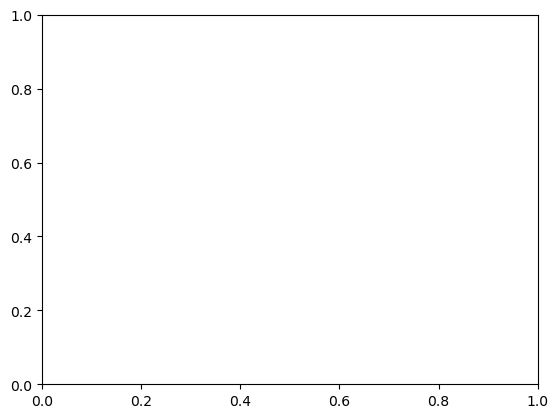

In [29]:
# plot
fig, ax = plt.subplots()

In [36]:
ax.scatter(total_concat_df.iloc[:, 0], total_concat_df['P40_mouse'], s=total_concat_df['P40_score'], c=total_concat_df['P40_pct_lesion'], vmin=0, vmax=100)
plt.show()